In [268]:
%reset -f

#2022July8 linear regression power formula, KML file added

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns

In [269]:
df_county1=pd.read_csv('silagecorn-county.csv')
#df_county1.drop(columns=['Province_number', 'County_number'])
#display(df_county1)

In [270]:
df_county2 = df_county1[['County','Region','growth_days','irrig_count','irrig_wat_m3ha','Ecwat'
                         , 'ETo_mm','elevation_m', 'latitude','longitude','yield_tonha' ]].copy()
display(df_county2)

,County,Region,growth_days,irrig_count,irrig_wat_m3ha,Ecwat,ETo_mm,elevation_m,latitude,longitude,yield_tonha
0,Karaj,NW,97.3,8.8,8754.5,0.4,580.0,1372.9,35.802776,50.947926,49.5
1,Hashtgerd,NW,97.0,14.5,6867.5,0.3,554.5,1612.9,35.951485,50.668327,55.0
2,EslamShahr,NW,96.2,9.0,6825.6,0.8,639.2,1162.9,35.551202,51.230455,51.9
3,Pakdasht,NW,100.7,8.0,5922.9,0.8,651.8,987.3,35.415008,51.731349,55.0
4,Shahrerey,NW,84.5,6.0,6134.0,1.7,592.9,1012.3,35.577045,51.462464,56.9
5,Abyek,NW,102.4,8.8,8692.6,2.7,581.8,1279.1,36.040428,50.544616,50.4
6,BoyeenZahra,NW,109.6,9.4,7308.8,3.1,763.3,1282.0,35.765430,50.052859,47.8
7,Moghan,NW,83.8,4.7,5868.3,1.1,421.7,96.6,39.511879,47.945006,32.8
8,Shahinshar,SW,103.3,18.0,8000.8,2.4,732.5,1715.3,32.860873,51.553297,58.2
9,Sepidan,SW,94.8,16.0,9088.5,2.3,587.8,1600.0,30.256021,51.975202,59.8


In [271]:
df_zone1=df_county2.groupby('Region').mean()
display(df_zone1)

,growth_days,irrig_count,irrig_wat_m3ha,Ecwat,ETo_mm,elevation_m,latitude,longitude,yield_tonha
Region,,,,,,,,,
NE,92.433333,16.633333,9695.366667,1.2000,782.633333,1015.70,36.197122,59.052779,76.066667
NW,96.437500,8.650000,7046.775000,1.3625,598.150000,1100.75,36.201907,50.572875,49.912500
SW,99.260000,16.200000,8068.380000,1.7600,602.220000,1063.96,31.195556,50.994579,55.680000


Text(0.5, 1.0, 'Linear Regression-R2=0.845')

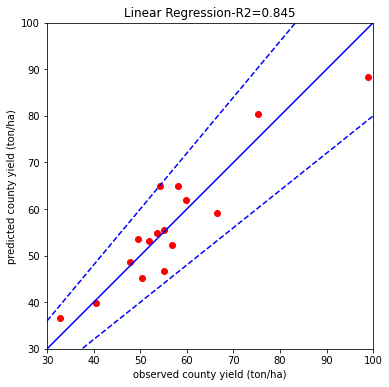

In [282]:
x = df_county2[['growth_days','irrig_count','irrig_wat_m3ha','Ecwat','ETo_mm','elevation_m']].to_numpy()
#x = df_county2[['latitude','longitude']].to_numpy()
#x = df_county2[['growth_days','irrig_wat_m3ha','ETo_mm']].to_numpy()
#x = df_county2[['irrig_wat_m3ha','ETo_mm']].to_numpy()
#x = df_county2[['irrig_wat_m3ha','ETo_mm']].to_numpy()
y = df_county2[["yield_tonha"]].to_numpy().ravel()

xmin=np.min(x,axis=0)
xmax=np.max(x,axis=0)
ymin=np.min(y)
ymax=np.max(y)
X=(x-xmin)/(xmax-xmin)
Y=(y-ymin)/(ymax-ymin)

regressor_lin1 = LinearRegression()
#regressor_lin1=DecisionTreeRegressor(max_depth=5,min_samples_leaf=4)
#regressor_lin1 = MLPRegressor(hidden_layer_sizes=5,max_iter=500000, activation='tanh')
regressor_lin1.fit(X,Y)
#regressor_lin1.fit(X,X)
Y_hat_lin1 = regressor_lin1.predict(X)

y_hat_lin1=Y_hat_lin1*(ymax-ymin)+ymin

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)
ax.scatter(y, y_hat_lin1, color = 'red')
ax.plot(np.array([0,100]),np.array([0,100]), 'b-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'b--')
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=30,right=100)
ax.set_ylim(bottom=30,top=100)
ax.set_aspect('equal')

fig.savefig('county_yield.png', dpi=300)

ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))

[ 1.358  2.963 -0.734]


Text(0.5, 1.0, 'Latitude & Longitude - R2=0.696')

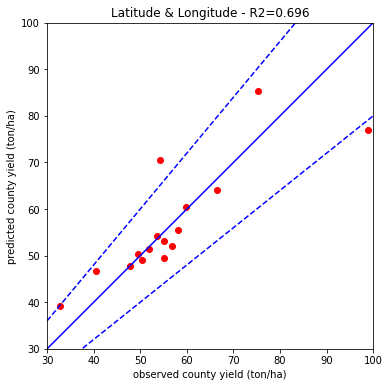

In [288]:
N=16
x0=np.ones((N,1)).ravel()
x1_long = df_county2[['longitude']].to_numpy().ravel()
x2_lat = df_county2[['latitude']].to_numpy().ravel()
x=np.c_[x0,x1_long,x2_lat]
y = df_county2[["yield_tonha"]].to_numpy().ravel()
a0 = [1.358, 2.963, -0.734]

def func1(a,x): 
    x1_long=x[:,1]
    x2_lat=x[:,2]
    return 60*a[0]*(x1_long/60)**(a[1])*(x2_lat/36)**(a[2])

func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)

print(a0)

yhat=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)
ax.scatter(y, yhat, color = 'red')
ax.plot(np.array([0,100]),np.array([0,100]), 'b-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'b--')
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=30,right=100)
ax.set_ylim(bottom=30,top=100)
ax.set_aspect('equal')
fig.savefig('county_yield.png', dpi=300)
ax.set_title("Latitude & Longitude - R2="+str(np.round(r2_score(y,yhat),3)))

[ 1.062 -1.395  0.274  0.136 -0.022  0.646  0.055]


Text(0.5, 1.0, 'Power Formula-R2=0.846')

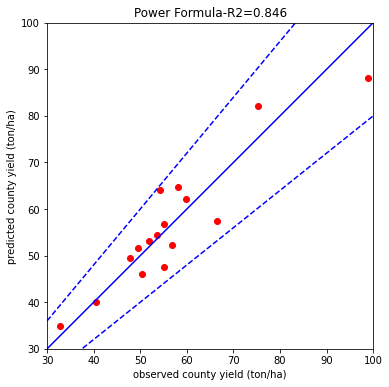

In [283]:
N=16
x0=np.zeros((N,1)).ravel()
x1 = df_county2[['growth_days']].to_numpy().ravel()
x2 = df_county2[['irrig_count']].to_numpy().ravel()
x3 = df_county2[['irrig_wat_m3ha']].to_numpy().ravel()
x4 = df_county2[['Ecwat']].to_numpy().ravel()
x5 = df_county2[['ETo_mm']].to_numpy().ravel()
x6 = df_county2[['elevation_m']].to_numpy().ravel()
x=np.c_[x0,x1,x2,x3,x4,x5,x6]
y = df_county2[["yield_tonha"]].to_numpy().ravel()
a0 = [1.062, -1.395, 0.274, 0.136, -0.022, 0.646, 0.055]

def func1(a,x): 
    x1=x[:,1]
    x2=x[:,2]
    x3=x[:,3]
    x4=x[:,4]
    x5=x[:,5]
    x6=x[:,6]
    return 60*a[0]*(x1/110)**a[1]*(x2/25)**a[2]*(x3/8000)**a[3]*(x4/1.4)**a[4]*(x5/700)**a[5]*(x6/1700)**a[6]

func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
yhat=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)
ax.scatter(y, yhat, color = 'red')
ax.plot(np.array([0,100]),np.array([0,100]), 'b-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'b--')
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=30,right=100)
ax.set_ylim(bottom=30,top=100)
ax.set_aspect('equal')
fig.savefig('county_yield.png', dpi=300)
ax.set_title("Power Formula-R2="+str(np.round(r2_score(y,yhat),3)))

In [275]:
#here is the formula (markdown cell)
#draw with excel, add color for region (green, red, blue)
#add tag text for county name

$\frac{Yield}{60 ton/ha} = 
1.062       
\times {(\frac{GD}{110 days})}                ^{-1.395} 
\times {(\frac{Irrigation_{count}}{25 times})}^{0.274}
\times {(\frac{IrrigWat}{8000 m^{3}/ha})}     ^{0.136} 
\times {(\frac{ECwat}{1.4 dS/m})}             ^{-0.022}
\times {(\frac{ETo}{700 mm})}                 ^{0.646} 
\times {(\frac{Elevation}{1700 m})}           ^{0.055}$

